In [1]:
import pickle
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
import seaborn as sns
import datetime as datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar
import nltk

% matplotlib inline

## Preparing the articles for Topic Modeling

In [51]:
raw_age = pd.read_pickle('the_age_df.pkl')
age = raw_age[(raw_age.year == 2016) & (raw_age.month != 9)]

In [62]:
stop_words = stopwords.words('english')
stop_words += ['mr', 'mrs', 'ms', 'like', 'says', 'many',
              'per', 'since', 'still', 'back', 'according', 'even']

In [67]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.4, min_df = 15,
                                   stop_words = stop_words)
tfidf = tfidf_vectorizer.fit_transform(age.article)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
nmf = NMF(n_components = 60, random_state=1, alpha=.1, l1_ratio=.5).fit(tfidf)

In [68]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic:" + str(int(topic_idx)+1))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [69]:
transformed_data = nmf.transform(tfidf)

## Top Words Per Topic

In [70]:
print_top_words(nmf, tfidf_feature_names, 20)

Topic:1
brussels belgian attacks abdeslam paris belgium airport suicide bakraoui bombers metro el laachraoui terrorist prosecutors security bomb suspected arrested syria
Topic:2
trump donald republican clinton campaign presidential candidate nominee rally hillary gop presumptive fox comments kelly lewandowski washington america ryan muslims
Topic:3
china sea chinese south beijing philippines vietnam islands claims australia waters disputed defence military navigation international territorial xi navy maritime
Topic:4
eu britain cameron referendum brexit european vote leave british uk union london johnson minister prime scotland remain party europe campaign
Topic:5
syrian syria assad aleppo al rebel talks opposition forces aid damascus air war strikes humanitarian bashar areas russia geneva russian
Topic:6
zika virus microcephaly brazil health cases mosquito pregnant disease birth babies transmission outbreak vaccine cdc infected spread defects brain countries
Topic:7
faulkner elamine w

## Naming the Topics

In [1]:
topics = {1:'Terrorism', 2:'Trump',
         3:'China-Philippines Maritime Dispute',4:'Brexit',
          5: 'Syria', 6: 'Zika',
          7: 'Sally Faulkner Kidnapping Case', 8: 'Iraq',
          9: 'Russia', 10: 'U.S. Presidential Elections',
          11: 'Jurisprudence', 12: 'EU Refugee Crisis',
          13: 'EgyptAir Crash', 14: 'Palestine/Israel',
          15: 'Police', 16: "Iran-Saudi Arabia Tensions",
          17: 'Malaysia Corruption Scandal', 18: 'Indonesia',
          19: 'El Chapo', 20: 'Turkey Airport Bombing',
          21: 'Taliban', 22: 'Pope Francis',
          23: 'Germany', 24: 'France',
          25: 'Climate Change', 26: "Rodrigo Duterte",
         27: 'North Korea', 28: "Women's Rights", 
         29: 'Other', 30: 'U.S. Politics',
         31: 'U.N.', 32: 'Shootings',
         33: 'Turkey Coup', 34: 'Sri Lanka Refugees',
         35: 'Rio Olympics' , 36: 'U.S. Orlando Shooting', 
         37: 'Iran' , 38: 'Bangladesh Attack', 
         39: 'Earthquakes', 40: 'Ouagadougou attacks',
         41: 'Hong Kong', 42: 'U.S. Republican Primary',
         43: 'Education', 44: 'Myanmar: Aung San Suu Kyi',
         45: 'Rye Hunt Disappearance', 46: 'Cuba',
         47: 'Canadian Politics', 48: 'Taiwan', 
         49: 'Brazil Corruption', 50: 'Fiji Cyclone',
         51: 'Boko Haram', 52: 'India',
         53: 'Apple-FBI Dispute', 54: 'Death Penalty',
         55: 'Space', 56: 'WikiLeaks', 
         57: 'Other', 58: 'Other', 
         59: 'Animals', 60: 'Lottery'}

# Cleaning Up Data

In [266]:
# Cleaning Up Data
final_data = pd.DataFrame(transformed_data).applymap(lambda x: 1 if x>.15 else 0)
final_data.columns = topics.values()
final_data['month'] = [i for i in age.month]

by_month = final_data.groupby('month').sum()
for i in range(7):
    by_month.iloc[i] = by_month.iloc[i]/float(np.sum(by_month.iloc[i]))

In [267]:
by_month.to_pickle('australia_month.pkl')

In [2]:
by_month = pd.read_pickle('australia_month.pkl')

# Top 5 Topics per Month

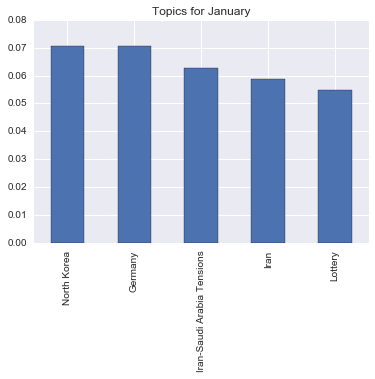

In [14]:
# North Korean Nuclear Test
# Australia Removes itself from climate change enwspapers!
by_month.iloc[0].sort_values(ascending = False).head().plot(kind = 'bar')
plt.title('Topics for January')

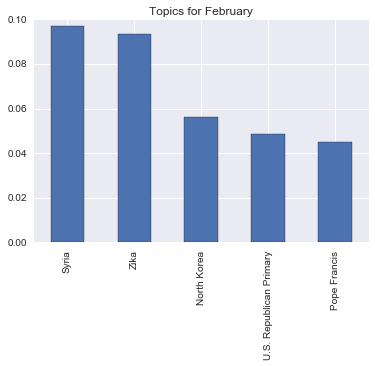

In [15]:
# Syrian Aleppo Advance
# Zika
by_month.iloc[1].sort_values(ascending = False).head().plot(kind = 'bar')
plt.title('Topics for February')

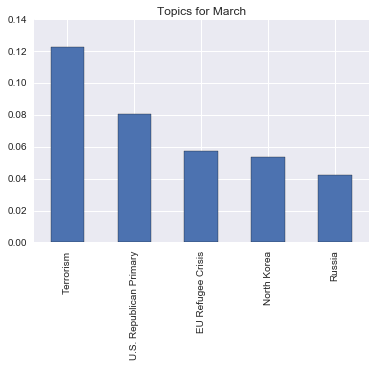

In [16]:
# General Terrorism
# American Primary
by_month.iloc[2].sort_values(ascending = False).head().plot(kind = 'bar')
plt.title('Topics for March')

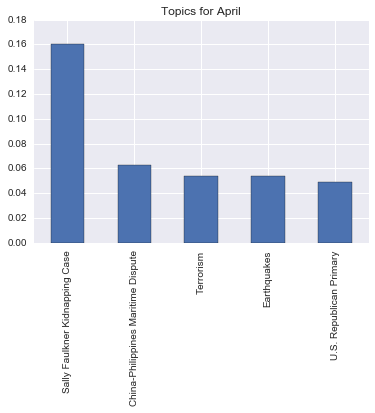

In [17]:
# Sally Faulktner
# China-Philippines Dispute
by_month.iloc[3].sort_values(ascending = False).head().plot(kind = 'bar')
plt.title('Topics for April')

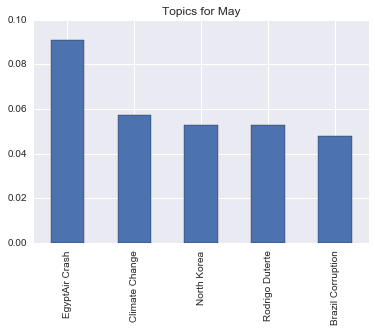

In [20]:
# Egyption Crash
# Australia Removes itself from climate change enwspapers!
by_month.iloc[4].sort_values(ascending = False).head().plot(kind = 'bar')
_ = plt.title('Topics for May')

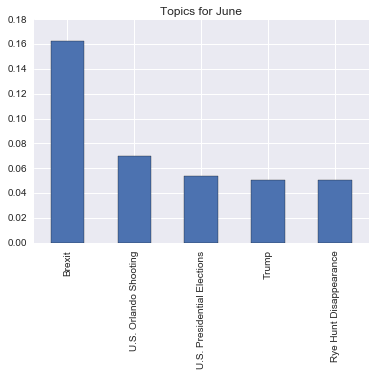

In [21]:
# Brexit
# Orlando Shooting
by_month.iloc[5].sort_values(ascending = False).head().plot(kind = 'bar')
_ = plt.title('Topics for June')

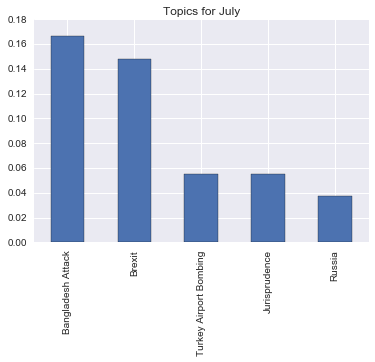

In [22]:
# Bangladesh Terjrorist Attack
# Brexit
by_month.iloc[6].sort_values(ascending = False).head().plot(kind = 'bar')
_ = plt.title('Topics for July')

# Top Topics for the Year

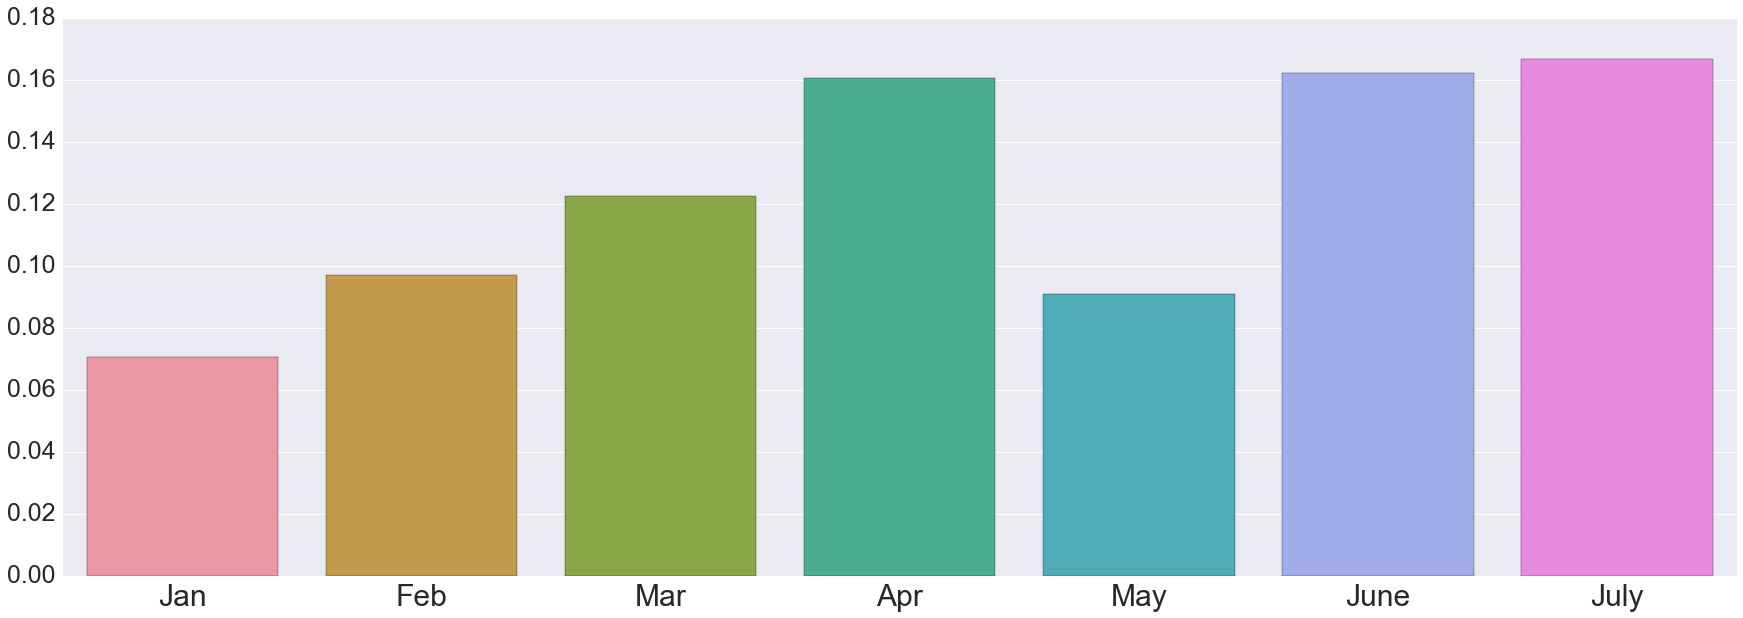

In [8]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', "June", "July"]
lst = []
topics_ =[]
for i in range(7):
    x = by_month.iloc[i].sort_values(ascending = False).head(1)
    lst.append(x[0])
    topics_.append(x.keys()[0])
rc={'xtick.labelsize': 30, 'ytick.labelsize': 25, 'axes.labelsize': 25, 'font.size': 25, 'legend.fontsize': 30.0, 'axes.titlesize': 20, "figure.figsize": [30, 10]}
sns.set(rc = rc)
sns.barplot(x = months, y = lst)

In [9]:
topics_

['North Korea',
 'Syria',
 'Terrorism',
 'Sally Faulkner Kidnapping Case',
 'EgyptAir Crash',
 'Brexit',
 'Bangladesh Attack']